## PrivFED-A Framework for Privacy-Preserving Federated Learning in Enhanced Breast Cancer Diagnosis.

Abstract : On a day-to-day basis, hospitals engage in the transaction of thousands of Personally Identifiable Information (PII) data with other healthcare institutions, making data prone to various cybersecurity threats. In the present study, a federated learning framework is proposed, trained on the Wisconsin dataset. The framework incorporates various techniques to address challenges such as data scarcity and imbalance, utilizing the Synthetic Minority Over-sampling Technique (SMOTE) to enhance robustness. Additionally, isolation forests are employed to enhance the model's resilience to outliers. In the classification process across all devices, Catboost was utilized. An analysis was conducted to identify optimal features for achieving higher accuracy, employing Principal Component Analysis (PCA). Furthermore, the significance of hyperparameter tuning is emphasized through a comparative analysis. The model demonstrated an average accuracy of 99.95% on edge devices and 98% on the central server.

## Mount the Storage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Without PCA

##Load the neccesary libraries

In [ ]:
!pip3 install catboost
import catboost as cbt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 10.9 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pickle

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np


## Preparing the Dataset

## Importing Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Dividing the dataset into three parts.


> The data set is divided into three equal parts to simulate individial data from users.




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/data.csv")
# df = df.dropna()
df.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:

# Assuming 'df' is your DataFrame
columns_str = ', '.join(f"'{col}'" for col in df.columns)

# Print or use the result as needed
print(columns_str)


'id', 'label', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'


In [ ]:
df['label']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: label, Length: 569, dtype: object

In [ ]:
df=df[['label', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
df = df[df['label']!=' ']
df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Divide the data into three parts
X = df.drop('label', axis=1)
y = df['label']

Label Count Before SMOTE Analysis.

In [ ]:
df.label.value_counts()

B    357
M    212
Name: label, dtype: int64

## Performing SMOTE Analysis

In [1]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={"B":20000,"M":20000})

In [ ]:
X, y = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (20000) in class B will be larger than the number of samples in the majority class (class #B -> 357)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (20000) in class M will be larger than the number of samples in the majority class (class #B -> 357)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Label Count AFTER SMOTE Analysis.

In [ ]:
pd.Series(y).value_counts()

M    20000
B    20000
Name: label, dtype: int64

In [ ]:
df.isnull().any()

label                      False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

Label Count AFTER SMOTE Analysis.

In [ ]:
pd.Series(y).value_counts()

M    20000
B    20000
Name: label, dtype: int64

In [ ]:
df.isnull().any()

label                      False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

## Outlier Detection and Removal using Isolation Forest Classifier

In [ ]:
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X)

# get the outlier indices
outlier_indices = clf.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# remove the outliers
X = X[outlier_indices == 1]
y = y[outlier_indices == 1]

Label Count AFTER Outliers Removal.

In [ ]:
pd.Series(y).value_counts()

B    18797
M    17203
Name: label, dtype: int64

Dividing the data set into three equal parts ( For ED1 , ED2 and CS)

In [ ]:
X_edge1, X_edge2, y_edge1, y_edge2 = train_test_split(X, y, test_size=0.33, random_state=42)
X_central, X_edge2, y_central, y_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.50, random_state=42)

## Virtual Edge Machines:
A virtual edge machine is a virtualized version of an edge device that is used in federated learning. It simulates the behavior of an actual edge device, such as a smartphone or an IoT sensor, in a controlled environment. It allows researchers and engineers to test and develop federated learning models without the need for actual physical devices.



### Virtual edge machine 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

0:	learn: 0.1553032	total: 55.4ms	remaining: 2.72s
1:	learn: 0.0935449	total: 62ms	remaining: 1.49s
2:	learn: 0.0693619	total: 68.9ms	remaining: 1.08s
3:	learn: 0.0568952	total: 75.7ms	remaining: 871ms
4:	learn: 0.0477569	total: 82.2ms	remaining: 740ms
5:	learn: 0.0422258	total: 97.3ms	remaining: 713ms
6:	learn: 0.0361286	total: 113ms	remaining: 697ms
7:	learn: 0.0329906	total: 121ms	remaining: 637ms
8:	learn: 0.0278088	total: 128ms	remaining: 585ms
9:	learn: 0.0246720	total: 136ms	remaining: 542ms
10:	learn: 0.0222079	total: 143ms	remaining: 506ms
11:	learn: 0.0205620	total: 150ms	remaining: 475ms
12:	learn: 0.0180464	total: 157ms	remaining: 447ms
13:	learn: 0.0169882	total: 164ms	remaining: 422ms
14:	learn: 0.0154373	total: 171ms	remaining: 399ms
15:	learn: 0.0147095	total: 178ms	remaining: 378ms
16:	learn: 0.0138596	total: 185ms	remaining: 359ms
17:	learn: 0.0125146	total: 192ms	remaining: 340ms
18:	learn: 0.0113951	total: 199ms	remaining: 324ms
19:	learn: 0.0106205	total: 205ms	rem

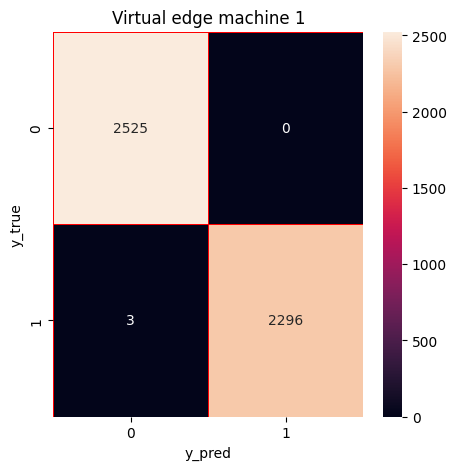

In [ ]:
# Split the data into a training and test set for edge1 dataset
X_train_edge1, X_test_edge1, y_train_edge1, y_test_edge1 = train_test_split(X_edge1, y_edge1, test_size=0.2)
y_train_edge1 = y_train_edge1.ravel()
y_test_edge1 = y_test_edge1.ravel()


# Train a local model using the training data
model = cbt.CatBoostClassifier(depth =3 ,iterations=50, learning_rate=0.5)
model.fit(X_train_edge1, y_train_edge1)

# Predict test set results
y_pred_edge1 = model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
normal_edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

Hyperparameter tuning ED-1

Streaming output truncated to the last 5000 lines.
164:	learn: 0.0007550	total: 2.08s	remaining: 441ms
165:	learn: 0.0007550	total: 2.09s	remaining: 428ms
166:	learn: 0.0007549	total: 2.11s	remaining: 417ms
167:	learn: 0.0007549	total: 2.12s	remaining: 405ms
168:	learn: 0.0007549	total: 2.13s	remaining: 392ms
169:	learn: 0.0007549	total: 2.15s	remaining: 379ms
170:	learn: 0.0007549	total: 2.16s	remaining: 366ms
171:	learn: 0.0007548	total: 2.17s	remaining: 353ms
172:	learn: 0.0007548	total: 2.18s	remaining: 340ms
173:	learn: 0.0007548	total: 2.19s	remaining: 327ms
174:	learn: 0.0007548	total: 2.2s	remaining: 315ms
175:	learn: 0.0007548	total: 2.21s	remaining: 302ms
176:	learn: 0.0007548	total: 2.22s	remaining: 289ms
177:	learn: 0.0007547	total: 2.23s	remaining: 276ms
178:	learn: 0.0007548	total: 2.25s	remaining: 264ms
179:	learn: 0.0007548	total: 2.26s	remaining: 251ms
180:	learn: 0.0007547	total: 2.27s	remaining: 238ms
181:	learn: 0.0007547	total: 2.28s	remaining: 225ms
182:	learn: 0.

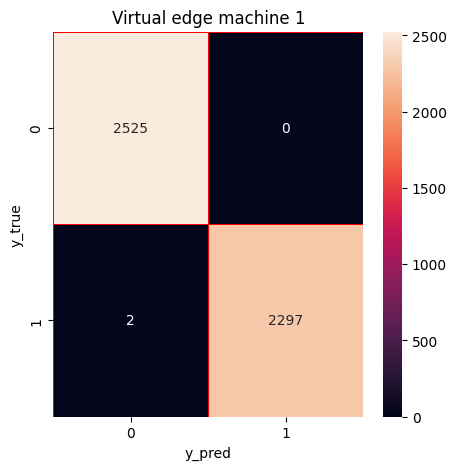

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge1 = best_model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('advanced_local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 1: ", normal_edge1_acc)
print("Accuracy of Hyper Parameter tuned Edge 1: ", edge1_acc)

Accuracy of Normal Edge 1:  0.9993781094527363
Accuracy of Hyper Parameter tuned Edge 1:  0.9995854063018242


### Virtual edge machine 2

0:	learn: 0.1555451	total: 19ms	remaining: 930ms
1:	learn: 0.0761319	total: 46.2ms	remaining: 1.11s
2:	learn: 0.0483960	total: 70.3ms	remaining: 1.1s
3:	learn: 0.0365862	total: 93.8ms	remaining: 1.08s
4:	learn: 0.0223336	total: 113ms	remaining: 1.02s
5:	learn: 0.0157828	total: 145ms	remaining: 1.06s
6:	learn: 0.0132739	total: 164ms	remaining: 1.01s
7:	learn: 0.0099470	total: 212ms	remaining: 1.11s
8:	learn: 0.0079870	total: 239ms	remaining: 1.09s
9:	learn: 0.0072986	total: 270ms	remaining: 1.08s
10:	learn: 0.0065636	total: 298ms	remaining: 1.06s
11:	learn: 0.0055926	total: 329ms	remaining: 1.04s
12:	learn: 0.0044517	total: 354ms	remaining: 1.01s
13:	learn: 0.0039002	total: 380ms	remaining: 978ms
14:	learn: 0.0034987	total: 403ms	remaining: 940ms
15:	learn: 0.0031047	total: 422ms	remaining: 897ms
16:	learn: 0.0028218	total: 449ms	remaining: 871ms
17:	learn: 0.0026377	total: 471ms	remaining: 837ms
18:	learn: 0.0023100	total: 496ms	remaining: 809ms
19:	learn: 0.0020187	total: 517ms	remain

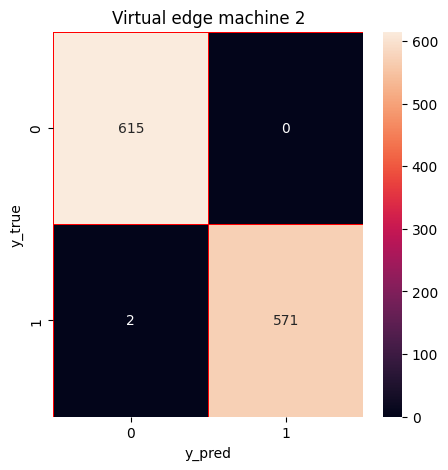

In [ ]:
# Split the data into a training and test set for edge2 dataset
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.2)
y_train_edge2 = y_train_edge2.ravel()
y_test_edge2 = y_test_edge2.ravel()

# Train a local model using the training data
model = cbt.CatBoostClassifier(iterations=50, learning_rate=0.5)
model.fit(X_train_edge2, y_train_edge2)

# Predict test set results
y_pred_edge2 = model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 2:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
normal_edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)

cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_edge2, y_pred_edge2, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

Streaming output truncated to the last 5000 lines.
164:	learn: 0.0007550	total: 2.9s	remaining: 615ms
165:	learn: 0.0007550	total: 2.93s	remaining: 600ms
166:	learn: 0.0007549	total: 2.95s	remaining: 583ms
167:	learn: 0.0007549	total: 2.98s	remaining: 567ms
168:	learn: 0.0007549	total: 3s	remaining: 550ms
169:	learn: 0.0007549	total: 3.03s	remaining: 535ms
170:	learn: 0.0007549	total: 3.05s	remaining: 518ms
171:	learn: 0.0007548	total: 3.09s	remaining: 502ms
172:	learn: 0.0007548	total: 3.11s	remaining: 486ms
173:	learn: 0.0007548	total: 3.13s	remaining: 468ms
174:	learn: 0.0007548	total: 3.15s	remaining: 451ms
175:	learn: 0.0007548	total: 3.18s	remaining: 434ms
176:	learn: 0.0007548	total: 3.21s	remaining: 418ms
177:	learn: 0.0007547	total: 3.24s	remaining: 401ms
178:	learn: 0.0007548	total: 3.27s	remaining: 384ms
179:	learn: 0.0007548	total: 3.3s	remaining: 367ms
180:	learn: 0.0007547	total: 3.32s	remaining: 349ms
181:	learn: 0.0007547	total: 3.35s	remaining: 332ms
182:	learn: 0.0007

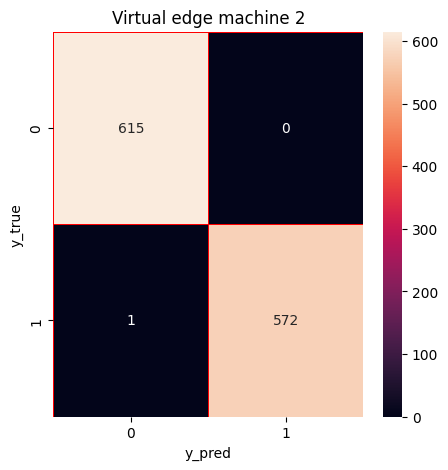

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge2 = best_model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)
cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 2: ", normal_edge2_acc)
print("Accuracy of Hyper Parameter tuned Edge 2: ", edge2_acc)

Accuracy of Normal Edge 2:  0.9983164983164983
Accuracy of Hyper Parameter tuned Edge 2:  0.9991582491582491


## Preparing Central Server's Dataset:

In [ ]:
X_train_Central, X_test_Central, y_train_Central, y_test_Central = train_test_split(X_central, y_central, test_size=0.2)

## Central Server:
A central server is a key component in Federated Learning. It acts as a hub that aggregates the updates from multiple edge devices and uses them to improve the overall model. The central server is responsible for coordinating the training process and managing the communication between edge devices.

The central server receives the model updates from edge devices, which are trained on their local data, and uses them to update the global model. This process is called model averaging, where the central server takes the average of all the updates received from the edge devices to improve the global model. The central server can also use other techniques to aggregate the updates such as weight averaging or voting.

The central server also plays a crucial role in maintaining the security and privacy of the data. It acts as a gatekeeper for the edge devices and controls the access to the data. It also ensures that the edge devices are compliant with the security protocols.

In summary, the central server is responsible for coordinating and managing the training process in Federated Learning, by aggregating the updates from multiple edge devices, maintaining the security and privacy of the data and controlling the access to the data. It plays a crucial role in the deployment of Federated Learning systems.

> Code For Central Server:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Learning rate set to 0.020043
0:	learn: 0.6441229	total: 9.1ms	remaining: 9.09s
1:	learn: 0.6023613	total: 18.6ms	remaining: 9.29s
2:	learn: 0.5616841	total: 27.6ms	remaining: 9.18s
3:	learn: 0.5225444	total: 36.6ms	remaining: 9.1s
4:	learn: 0.4849232	total: 45.4ms	remaining: 9.04s
5:	learn: 0.4548829	total: 54.2ms	remaining: 8.98s
6:	learn: 0.4257042	total: 62.9ms	remaining: 8.93s
7:	learn: 0.4036260	total: 71.7ms	remaining: 8.89s
8:	learn: 0.3762572	total: 80.6ms	remaining: 8.87s
9:	learn: 0.3542125	total: 89.2ms	remaining: 8.84s
10:	learn: 0.3297673	total: 97.9ms	remaining: 8.8s
11:	learn: 0.3095521	total: 107ms	remaining: 8.79s
12:	learn: 0.2930318	total: 116ms	remaining: 8.79s
13:	learn: 0.2751447	total: 125ms	remaining: 8.77s
14:	learn: 0.2591086	total: 134ms	remaining: 8.78s
15:	learn: 0.2451678	total: 143ms	remaining: 8.78s
16:	learn: 0.2340319	total: 152ms	remaining: 8.78s
17:	learn: 0.2240076	total: 161ms	remaining: 8.77s
18:	learn: 0.2123062	total: 170ms	remaining: 8.79s
19:

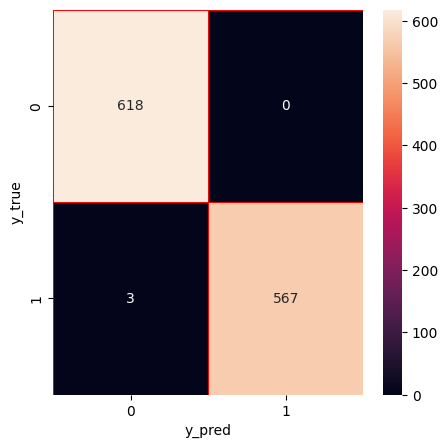

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Load the models
with open('advanced_local_model_edge1.pickle', 'rb') as f:
    model_edge1 = pickle.load(f)
with open('local_model_edge2.pickle', 'rb') as f:
    model_edge2 = pickle.load(f)

# Ensemble the models to create a global model using BaggingClassifier
global_model = BaggingClassifier(base_estimator=model_edge1, n_estimators=2)
global_model.estimators_ = [model_edge1, model_edge2]

global_model.fit(X_train_Central, y_train_Central)

# Predict the test set results using the corresponding central dataset
y_pred = global_model.predict(X_test_Central)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test_Central, y_pred)
print("Confusion matrix for Central Server:\n", conf_matrix)
# Save the global model as a pickle file
with open('global_model.pickle', 'wb') as f:
    pickle.dump(global_model, f)
central_acc = accuracy_score(y_test_Central, y_pred)

print(classification_report(y_test_Central,y_pred))
cm=confusion_matrix(y_test_Central,y_pred)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_Central, y_pred, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Analysis of the models:
Accuracy is a commonly used metric to evaluate the performance of machine learning models. In Federated Learning, the accuracy of the three systems, Edge Device 1, Edge Device 2 and the central server, can be used to evaluate the performance of the overall system.

The accuracy of the Edge Devices can be calculated by comparing the predictions made by the local models trained on the edge devices with the true labels of the test data. Similarly, the accuracy of the central server can be calculated by comparing the predictions made by the global model with the true labels of the test data.

A high accuracy for the Edge Devices and the central server indicates that the models are able to correctly classify the test data, and therefore have a good performance. However, it is also important to consider other evaluation metrics such as precision, recall, and F1-score, to get a more comprehensive understanding of the performance of the models.

Comparing the accuracy of the three systems can help to evaluate the performance of the overall system and identify potential issues such as overfitting or bias. It also can be used to evaluate the effect of different configurations and techniques used in Federated Learning such as data sampling, data aggregation, and model averaging on the performance of the system.

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Edge Device 1: ", edge1_acc)
print("Accuracy of Edge Device 2: ", edge2_acc)
print("Accuracy of Central Server: ", central_acc)

Accuracy of Edge Device 1:  0.9995854063018242
Accuracy of Edge Device 2:  0.9991582491582491
Accuracy of Central Server:  0.9974747474747475


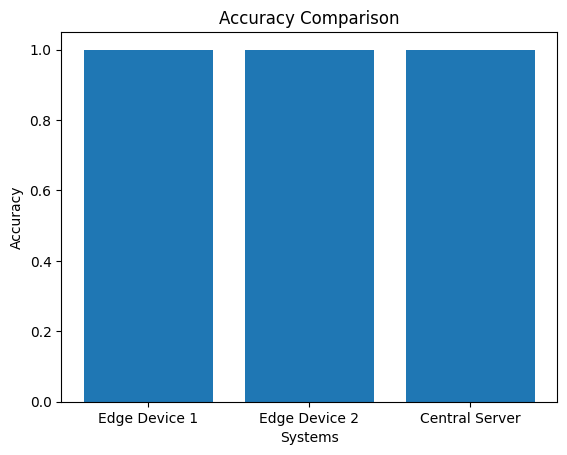

In [ ]:
systems = ['Edge Device 1', 'Edge Device 2', 'Central Server']
accuracies = [normal_edge1_acc, normal_edge2_acc, central_acc]

plt.bar(systems, accuracies)
plt.xlabel('Systems')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

In [ ]:
# Find the system with the highest accuracy
best_system = max(edge1_acc, edge2_acc, central_acc)

if best_system == edge1_acc:
    # Save the model from Edge Device 1 as the new model file
    with open("Distribution_model.pkl", "wb") as file:
        pickle.dump(model_edge1, file)
elif best_system == edge2_acc:
    # Save the model from Edge Device 2 as the new model file
    with open("Distribution_model.pkl", "wb") as file:
        pickle.dump(model_edge2, file)
else:
    # Save the model from the Central Server as the new model file
    with open("Distribution_model.pkl", "wb") as file:
        pickle.dump(global_model, file)


In conclusion, Federated Learning is a powerful method for training machine learning models that allows for large and diverse datasets to be used without compromising the privacy of users. The three main components of Federated Learning are edge devices, central servers, and virtual edge devices. Edge devices are responsible for training local models using their own data, central servers aggregate updates from the edge devices to improve the global model, and virtual edge devices are used to simulate and test the behavior of edge devices in a controlled environment. Accuracies of the three systems are important metric to evaluate the performance of the overall system.

# Implementing PCA

## Trying With Less Important features Features

### Dataset Upload

In [ ]:
import pandas as pd
df = pd.read_csv("/content/data.csv")
df.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Dividing the dataset into three parts.


> The data set is divided into three equal parts to simulate individial data from users.




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/data.csv")
# df = df.dropna()
df.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['label']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: label, Length: 569, dtype: object

In [ ]:
df=df[['label', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
df = df[df['label']!=' ']
df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Divide the data into three parts
X = df.drop('label', axis=1)
y = df['label']

### Performing PCA Algorithm

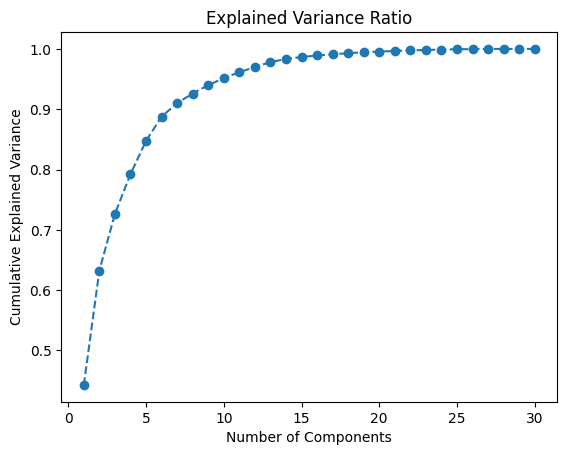

Most Important Features:
PC1       concave points_mean
PC2    fractal_dimension_mean
PC3                texture_se
PC4             texture_worst
PC5           smoothness_mean
dtype: object
Least Important Features:
PC1           smoothness_se
PC2    concave points_worst
PC3          concavity_mean
PC4            concavity_se
PC5            radius_worst
dtype: object


In [ ]:
# Assuming 'X' is your original feature matrix

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio to decide the number of components
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Step 5: Choose the number of components based on the plot or a desired explained variance threshold
desired_variance_threshold = 0.95
cumulative_variance = 0
num_components = 0

for i, variance in enumerate(explained_variance_ratio):
    cumulative_variance += variance
    num_components += 1
    if cumulative_variance >= desired_variance_threshold:
        break

# Step 6: Use the selected number of components to perform PCA again
pca = PCA(n_components=num_components)
X_final = pca.fit_transform(X_scaled)

# Step 7: Find the most important and least important features by examining the loadings of the principal components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(num_components)], index=X.columns)
most_important_features = loadings.abs().idxmax(axis=0)
least_important_features = loadings.abs().idxmin(axis=0)

# Step 8: Print the top 5 most important and least important features
print("Most Important Features:")
print(most_important_features.head(5))
print("Least Important Features:")
print(least_important_features.head(5))


### Preping the dataframe to accomodate less important features.

In [ ]:
# Assuming 'df' is your DataFrame

# Keep only the specified features
selected_features = ['smoothness_se', 'concave points_worst', 'concavity_mean', 'concavity_se', 'radius_worst']
X = df[selected_features]

# Now, 'X' contains only the specified features

# Print or use 'X' as needed
print("Selected Features:")
print(X)


Selected Features:
     smoothness_se  concave points_worst  concavity_mean  concavity_se  \
0         0.006399                0.2654         0.30010       0.05373   
1         0.005225                0.1860         0.08690       0.01860   
2         0.006150                0.2430         0.19740       0.03832   
3         0.009110                0.2575         0.24140       0.05661   
4         0.011490                0.1625         0.19800       0.05688   
..             ...                   ...             ...           ...   
564       0.010300                0.2216         0.24390       0.05198   
565       0.005769                0.1628         0.14400       0.03950   
566       0.005903                0.1418         0.09251       0.04730   
567       0.006522                0.2650         0.35140       0.07117   
568       0.007189                0.0000         0.00000       0.00000   

     radius_worst  
0          25.380  
1          24.990  
2          23.570  
3          1

Label Count Before SMOTE Analysis.

In [ ]:
df.label.value_counts()

B    357
M    212
Name: label, dtype: int64

### Performing SMOTE Analysis

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={"B":20000,"M":20000})

In [ ]:
X, y = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (20000) in class B will be larger than the number of samples in the majority class (class #B -> 357)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (20000) in class M will be larger than the number of samples in the majority class (class #B -> 357)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Label Count AFTER SMOTE Analysis.

In [ ]:
pd.Series(y).value_counts()

M    20000
B    20000
Name: label, dtype: int64

In [ ]:
df.isnull().any()

label                      False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

Label Count AFTER SMOTE Analysis.

In [ ]:
pd.Series(y).value_counts()

M    20000
B    20000
Name: label, dtype: int64

In [ ]:
df.isnull().any()

label                      False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

### Outlier Detection and Removal using Isolation Forest Classifier

In [ ]:
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X)

# get the outlier indices
outlier_indices = clf.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# remove the outliers
X = X[outlier_indices == 1]
y = y[outlier_indices == 1]

In [ ]:
pd.Series(y).value_counts()

B    18538
M    17464
Name: label, dtype: int64

Dividing the data set into three equal parts ( For ED1 , ED2 and CS)

In [ ]:
X_edge1, X_edge2, y_edge1, y_edge2 = train_test_split(X, y, test_size=0.33, random_state=42)
X_central, X_edge2, y_central, y_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.50, random_state=42)

### Virtual Edge Machines:
A virtual edge machine is a virtualized version of an edge device that is used in federated learning. It simulates the behavior of an actual edge device, such as a smartphone or an IoT sensor, in a controlled environment. It allows researchers and engineers to test and develop federated learning models without the need for actual physical devices.



### Virtual edge machine 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

0:	learn: 0.6922894	total: 1.6ms	remaining: 78.4ms
1:	learn: 0.6914315	total: 5.75ms	remaining: 138ms
2:	learn: 0.6905792	total: 11ms	remaining: 172ms
3:	learn: 0.6897145	total: 12.4ms	remaining: 143ms
4:	learn: 0.6888754	total: 14.2ms	remaining: 128ms
5:	learn: 0.6880243	total: 16.5ms	remaining: 121ms
6:	learn: 0.6871712	total: 20.1ms	remaining: 123ms
7:	learn: 0.6863382	total: 22.1ms	remaining: 116ms
8:	learn: 0.6854815	total: 24.5ms	remaining: 112ms
9:	learn: 0.6846439	total: 27.4ms	remaining: 109ms
10:	learn: 0.6837981	total: 32ms	remaining: 113ms
11:	learn: 0.6829618	total: 33.8ms	remaining: 107ms
12:	learn: 0.6821328	total: 35.2ms	remaining: 100ms
13:	learn: 0.6812980	total: 36.6ms	remaining: 94ms
14:	learn: 0.6804558	total: 38.4ms	remaining: 89.6ms
15:	learn: 0.6796393	total: 40.8ms	remaining: 86.8ms
16:	learn: 0.6788070	total: 42.5ms	remaining: 82.5ms
17:	learn: 0.6779779	total: 46.5ms	remaining: 82.6ms
18:	learn: 0.6771543	total: 48.9ms	remaining: 79.8ms
19:	learn: 0.6763295	t

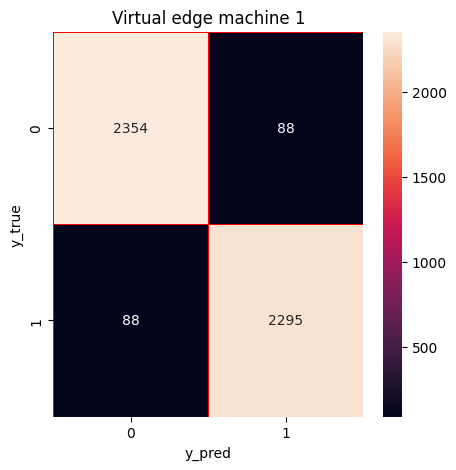

In [ ]:
# Split the data into a training and test set for edge1 dataset
X_train_edge1, X_test_edge1, y_train_edge1, y_test_edge1 = train_test_split(X_edge1, y_edge1, test_size=0.2)
y_train_edge1 = y_train_edge1.ravel()
y_test_edge1 = y_test_edge1.ravel()


# Train a local model using the training data
model = cbt.CatBoostClassifier(depth =3 ,iterations=50, learning_rate=0.001)
model.fit(X_train_edge1, y_train_edge1)

# Predict test set results
y_pred_edge1 = model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
normal_edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

#### Hyper parameter tuning

Streaming output truncated to the last 5000 lines.
164:	learn: 0.0104938	total: 664ms	remaining: 141ms
165:	learn: 0.0104473	total: 667ms	remaining: 137ms
166:	learn: 0.0103632	total: 671ms	remaining: 133ms
167:	learn: 0.0103343	total: 676ms	remaining: 129ms
168:	learn: 0.0102663	total: 688ms	remaining: 126ms
169:	learn: 0.0102411	total: 693ms	remaining: 122ms
170:	learn: 0.0102271	total: 697ms	remaining: 118ms
171:	learn: 0.0101469	total: 701ms	remaining: 114ms
172:	learn: 0.0100351	total: 706ms	remaining: 110ms
173:	learn: 0.0099436	total: 710ms	remaining: 106ms
174:	learn: 0.0099267	total: 714ms	remaining: 102ms
175:	learn: 0.0098322	total: 718ms	remaining: 97.9ms
176:	learn: 0.0097692	total: 721ms	remaining: 93.7ms
177:	learn: 0.0096803	total: 725ms	remaining: 89.6ms
178:	learn: 0.0095971	total: 729ms	remaining: 85.5ms
179:	learn: 0.0095583	total: 732ms	remaining: 81.4ms
180:	learn: 0.0094811	total: 736ms	remaining: 77.2ms
181:	learn: 0.0094423	total: 739ms	remaining: 73.1ms
182:	l

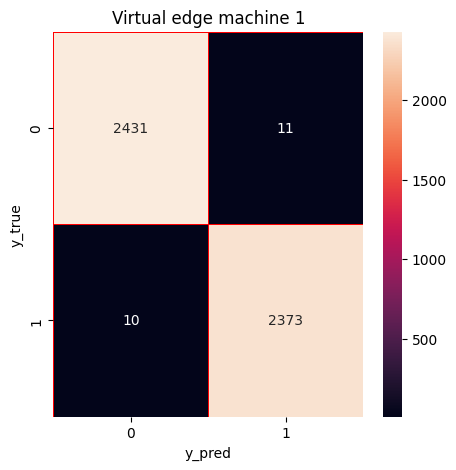

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge1 = best_model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('advanced_local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 1: ", normal_edge1_acc)
print("Accuracy of Hyper Parameter tuned Edge 1: ", edge1_acc)

Accuracy of Normal Edge 1:  0.9635233160621761
Accuracy of Hyper Parameter tuned Edge 1:  0.9956476683937824


### Virtual edge machine 2

0:	learn: 0.6536376	total: 1.79ms	remaining: 87.7ms
1:	learn: 0.6167337	total: 3.75ms	remaining: 90ms
2:	learn: 0.5821240	total: 5.43ms	remaining: 85.1ms
3:	learn: 0.5505268	total: 7.39ms	remaining: 85ms
4:	learn: 0.5217636	total: 8.96ms	remaining: 80.7ms
5:	learn: 0.4955916	total: 10.5ms	remaining: 77ms
6:	learn: 0.4708750	total: 12.3ms	remaining: 75.6ms
7:	learn: 0.4483874	total: 13.8ms	remaining: 72.7ms
8:	learn: 0.4261309	total: 15.9ms	remaining: 72.3ms
9:	learn: 0.4068008	total: 17.7ms	remaining: 70.6ms
10:	learn: 0.3877864	total: 19.7ms	remaining: 69.9ms
11:	learn: 0.3702790	total: 21.2ms	remaining: 67.1ms
12:	learn: 0.3545817	total: 22.9ms	remaining: 65.3ms
13:	learn: 0.3395969	total: 24.6ms	remaining: 63.2ms
14:	learn: 0.3253831	total: 26.4ms	remaining: 61.5ms
15:	learn: 0.3117726	total: 28.3ms	remaining: 60.1ms
16:	learn: 0.2989589	total: 29.9ms	remaining: 58.1ms
17:	learn: 0.2870540	total: 31.8ms	remaining: 56.6ms
18:	learn: 0.2758512	total: 33.4ms	remaining: 54.5ms
19:	learn

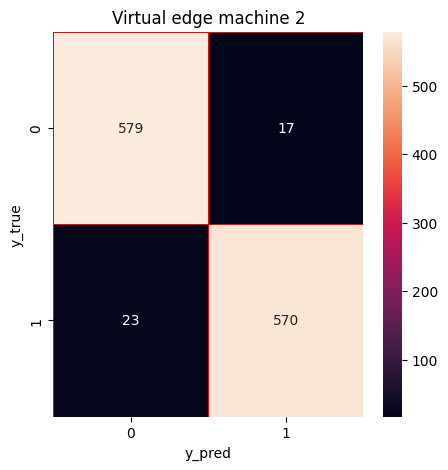

In [ ]:
# Split the data into a training and test set for edge2 dataset
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.2)
y_train_edge2 = y_train_edge2.ravel()
y_test_edge2 = y_test_edge2.ravel()

# Train a local model using the training data
model = cbt.CatBoostClassifier(iterations=50, learning_rate=0.05)
model.fit(X_train_edge2, y_train_edge2)

# Predict test set results
y_pred_edge2 = model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 2:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
normal_edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)

cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_edge2, y_pred_edge2, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

Streaming output truncated to the last 5000 lines.
164:	learn: 0.0104938	total: 662ms	remaining: 141ms
165:	learn: 0.0104473	total: 666ms	remaining: 136ms
166:	learn: 0.0103632	total: 670ms	remaining: 132ms
167:	learn: 0.0103343	total: 673ms	remaining: 128ms
168:	learn: 0.0102663	total: 677ms	remaining: 124ms
169:	learn: 0.0102411	total: 681ms	remaining: 120ms
170:	learn: 0.0102271	total: 684ms	remaining: 116ms
171:	learn: 0.0101469	total: 688ms	remaining: 112ms
172:	learn: 0.0100351	total: 691ms	remaining: 108ms
173:	learn: 0.0099436	total: 695ms	remaining: 104ms
174:	learn: 0.0099267	total: 699ms	remaining: 99.8ms
175:	learn: 0.0098322	total: 705ms	remaining: 96.1ms
176:	learn: 0.0097692	total: 709ms	remaining: 92.2ms
177:	learn: 0.0096803	total: 714ms	remaining: 88.3ms
178:	learn: 0.0095971	total: 719ms	remaining: 84.3ms
179:	learn: 0.0095583	total: 722ms	remaining: 80.2ms
180:	learn: 0.0094811	total: 726ms	remaining: 76.2ms
181:	learn: 0.0094423	total: 729ms	remaining: 72.1ms
182:	

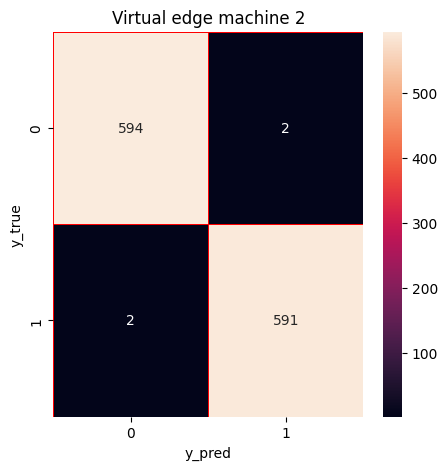

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge2 = best_model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)
cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 2: ", normal_edge2_acc)
print("Accuracy of Hyper Parameter tuned Edge 2: ", edge2_acc)

Accuracy of Normal Edge 2:  0.9663582842724979
Accuracy of Hyper Parameter tuned Edge 2:  0.9966358284272497


### Central Server

In [ ]:
X_train_Central, X_test_Central, y_train_Central, y_test_Central = train_test_split(X_central, y_central, test_size=0.2)

Learning rate set to 0.020043
0:	learn: 0.6491823	total: 2.13ms	remaining: 2.13s
1:	learn: 0.6047775	total: 4.73ms	remaining: 2.36s
2:	learn: 0.5651481	total: 7.13ms	remaining: 2.37s
3:	learn: 0.5283302	total: 9.34ms	remaining: 2.32s
4:	learn: 0.5001691	total: 11.3ms	remaining: 2.25s
5:	learn: 0.4734328	total: 13.4ms	remaining: 2.22s
6:	learn: 0.4436745	total: 15.5ms	remaining: 2.19s
7:	learn: 0.4140864	total: 17.7ms	remaining: 2.19s
8:	learn: 0.3891799	total: 19.7ms	remaining: 2.16s
9:	learn: 0.3662939	total: 21.7ms	remaining: 2.15s
10:	learn: 0.3442039	total: 24.9ms	remaining: 2.23s
11:	learn: 0.3250320	total: 27ms	remaining: 2.22s
12:	learn: 0.3075267	total: 29.3ms	remaining: 2.22s
13:	learn: 0.2910615	total: 32.3ms	remaining: 2.28s
14:	learn: 0.2756968	total: 34.5ms	remaining: 2.27s
15:	learn: 0.2612675	total: 36.8ms	remaining: 2.26s
16:	learn: 0.2478951	total: 38.9ms	remaining: 2.25s
17:	learn: 0.2364159	total: 41ms	remaining: 2.24s
18:	learn: 0.2260326	total: 43.3ms	remaining: 2.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


56:	learn: 0.0852790	total: 146ms	remaining: 2.41s
57:	learn: 0.0842787	total: 149ms	remaining: 2.42s
58:	learn: 0.0835187	total: 151ms	remaining: 2.41s
59:	learn: 0.0825404	total: 153ms	remaining: 2.4s
60:	learn: 0.0813716	total: 156ms	remaining: 2.4s
61:	learn: 0.0801818	total: 158ms	remaining: 2.39s
62:	learn: 0.0790745	total: 161ms	remaining: 2.39s
63:	learn: 0.0782572	total: 163ms	remaining: 2.38s
64:	learn: 0.0775323	total: 165ms	remaining: 2.38s
65:	learn: 0.0766682	total: 167ms	remaining: 2.37s
66:	learn: 0.0758637	total: 169ms	remaining: 2.36s
67:	learn: 0.0748580	total: 172ms	remaining: 2.35s
68:	learn: 0.0741573	total: 174ms	remaining: 2.35s
69:	learn: 0.0734545	total: 176ms	remaining: 2.34s
70:	learn: 0.0728397	total: 178ms	remaining: 2.33s
71:	learn: 0.0721169	total: 183ms	remaining: 2.36s
72:	learn: 0.0714087	total: 186ms	remaining: 2.36s
73:	learn: 0.0706905	total: 189ms	remaining: 2.36s
74:	learn: 0.0702118	total: 193ms	remaining: 2.38s
75:	learn: 0.0696863	total: 196ms

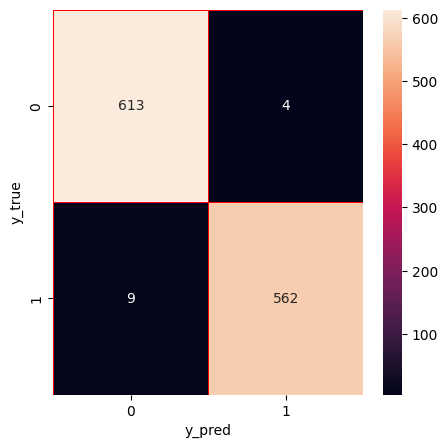

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Load the models
with open('advanced_local_model_edge1.pickle', 'rb') as f:
    model_edge1 = pickle.load(f)
with open('local_model_edge2.pickle', 'rb') as f:
    model_edge2 = pickle.load(f)

# Ensemble the models to create a global model using BaggingClassifier
global_model = BaggingClassifier(base_estimator=model_edge1, n_estimators=2)
global_model.estimators_ = [model_edge1, model_edge2]

global_model.fit(X_train_Central, y_train_Central)

# Predict the test set results using the corresponding central dataset
y_pred = global_model.predict(X_test_Central)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test_Central, y_pred)
print("Confusion matrix for Central Server:\n", conf_matrix)
# Save the global model as a pickle file
with open('global_model.pickle', 'wb') as f:
    pickle.dump(global_model, f)
central_acc = accuracy_score(y_test_Central, y_pred)

print(classification_report(y_test_Central,y_pred))
cm=confusion_matrix(y_test_Central,y_pred)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_Central, y_pred, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Edge Device 1: ", edge1_acc)
print("Accuracy of Edge Device 2: ", edge2_acc)
print("Accuracy of Central Server: ", central_acc)

Accuracy of Edge Device 1:  0.9956476683937824
Accuracy of Edge Device 2:  0.9966358284272497
Accuracy of Central Server:  0.9890572390572391


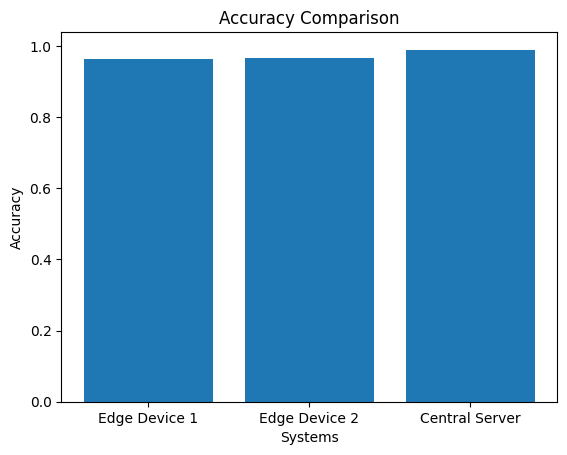

In [ ]:
systems = ['Edge Device 1', 'Edge Device 2', 'Central Server']
accuracies = [normal_edge1_acc, normal_edge2_acc, central_acc]

plt.bar(systems, accuracies)
plt.xlabel('Systems')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

## Similarly With the most important features

### Dataset Upload

In [ ]:
import pandas as pd
df = pd.read_csv("/content/data.csv")
df.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Dividing the dataset into three parts.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/data.csv")
# df = df.dropna()
df.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['label']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: label, Length: 569, dtype: object

In [ ]:
df=df[['label', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
df = df[df['label']!=' ']
df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Divide the data into three parts
X = df.drop('label', axis=1)
y = df['label']

### Performing PCA Algorithm

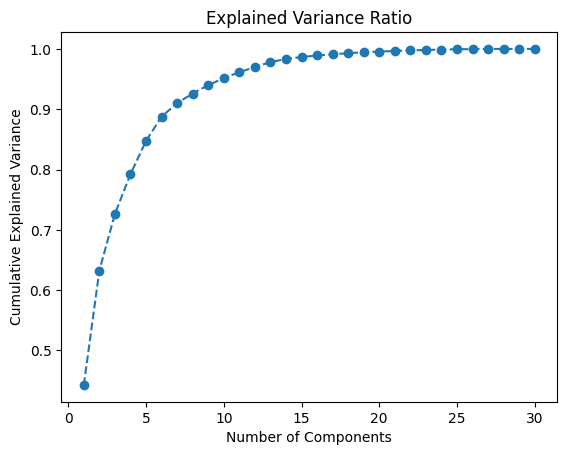

Most Important Features:
PC1       concave points_mean
PC2    fractal_dimension_mean
PC3                texture_se
PC4             texture_worst
PC5           smoothness_mean
dtype: object
Least Important Features:
PC1           smoothness_se
PC2    concave points_worst
PC3          concavity_mean
PC4            concavity_se
PC5            radius_worst
dtype: object


In [ ]:
# Assuming 'X' is your original feature matrix

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio to decide the number of components
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Step 5: Choose the number of components based on the plot or a desired explained variance threshold
desired_variance_threshold = 0.95
cumulative_variance = 0
num_components = 0

for i, variance in enumerate(explained_variance_ratio):
    cumulative_variance += variance
    num_components += 1
    if cumulative_variance >= desired_variance_threshold:
        break

# Step 6: Use the selected number of components to perform PCA again
pca = PCA(n_components=num_components)
X_final = pca.fit_transform(X_scaled)

# Step 7: Find the most important and least important features by examining the loadings of the principal components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(num_components)], index=X.columns)
most_important_features = loadings.abs().idxmax(axis=0)
least_important_features = loadings.abs().idxmin(axis=0)

# Step 8: Print the top 5 most important and least important features
print("Most Important Features:")
print(most_important_features.head(5))
print("Least Important Features:")
print(least_important_features.head(5))


### Preping the dataframe to accomodate More important features.

In [ ]:
# Assuming 'df' is your DataFrame

# Keep only the specified features
selected_features = ['concave points_mean', 'fractal_dimension_mean', 'texture_se', 'texture_worst', 'smoothness_mean']
X = df[selected_features]

# Now, 'X' contains only the specified features

# Print or use 'X' as needed
print("Selected Features:")
print(X)

Selected Features:
     concave points_mean  fractal_dimension_mean  texture_se  texture_worst  \
0                0.14710                 0.07871      0.9053          17.33   
1                0.07017                 0.05667      0.7339          23.41   
2                0.12790                 0.05999      0.7869          25.53   
3                0.10520                 0.09744      1.1560          26.50   
4                0.10430                 0.05883      0.7813          16.67   
..                   ...                     ...         ...            ...   
564              0.13890                 0.05623      1.2560          26.40   
565              0.09791                 0.05533      2.4630          38.25   
566              0.05302                 0.05648      1.0750          34.12   
567              0.15200                 0.07016      1.5950          39.42   
568              0.00000                 0.05884      1.4280          30.37   

     smoothness_mean  
0        

In [ ]:
df.label.value_counts()

B    357
M    212
Name: label, dtype: int64

### Performing SMOTE Analysis

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={"B":20000,"M":20000})

In [ ]:
X, y = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (20000) in class B will be larger than the number of samples in the majority class (class #B -> 357)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (20000) in class M will be larger than the number of samples in the majority class (class #B -> 357)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Label Count AFTER SMOTE Analysis.

In [ ]:
pd.Series(y).value_counts()

M    20000
B    20000
Name: label, dtype: int64

In [ ]:
df.isnull().any()

label                      False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

Label Count AFTER SMOTE Analysis.

In [ ]:
pd.Series(y).value_counts()

M    20000
B    20000
Name: label, dtype: int64

In [ ]:
df.isnull().any()

label                      False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

### Outlier Detection and Removal using Isolation Forest Classifier

In [ ]:
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X)

# get the outlier indices
outlier_indices = clf.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# remove the outliers
X = X[outlier_indices == 1]
y = y[outlier_indices == 1]

In [ ]:
pd.Series(y).value_counts()

B    18322
M    17679
Name: label, dtype: int64

Dividing the data set into three equal parts ( For ED1 , ED2 and CS)

In [ ]:
X_edge1, X_edge2, y_edge1, y_edge2 = train_test_split(X, y, test_size=0.33, random_state=42)
X_central, X_edge2, y_central, y_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.50, random_state=42)

### Virtual Edge Machines:
A virtual edge machine is a virtualized version of an edge device that is used in federated learning. It simulates the behavior of an actual edge device, such as a smartphone or an IoT sensor, in a controlled environment. It allows researchers and engineers to test and develop federated learning models without the need for actual physical devices.



### > Virtual edge machine 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

0:	learn: 0.3786942	total: 1.43ms	remaining: 70.3ms
1:	learn: 0.2424657	total: 2.99ms	remaining: 71.8ms
2:	learn: 0.1779951	total: 4.87ms	remaining: 76.3ms
3:	learn: 0.1332075	total: 6.62ms	remaining: 76.2ms
4:	learn: 0.1081650	total: 8.12ms	remaining: 73ms
5:	learn: 0.0925652	total: 9.76ms	remaining: 71.6ms
6:	learn: 0.0819073	total: 11.5ms	remaining: 70.9ms
7:	learn: 0.0746649	total: 13.3ms	remaining: 70ms
8:	learn: 0.0661485	total: 15ms	remaining: 68.5ms
9:	learn: 0.0604378	total: 16.8ms	remaining: 67.1ms
10:	learn: 0.0547798	total: 18.4ms	remaining: 65.2ms
11:	learn: 0.0521174	total: 19.9ms	remaining: 63.1ms
12:	learn: 0.0485871	total: 21.5ms	remaining: 61.3ms
13:	learn: 0.0450711	total: 23.2ms	remaining: 59.6ms
14:	learn: 0.0435904	total: 25.5ms	remaining: 59.5ms
15:	learn: 0.0412933	total: 27.5ms	remaining: 58.5ms
16:	learn: 0.0388197	total: 29.1ms	remaining: 56.5ms
17:	learn: 0.0369443	total: 30.7ms	remaining: 54.6ms
18:	learn: 0.0347111	total: 32.3ms	remaining: 52.8ms
19:	learn

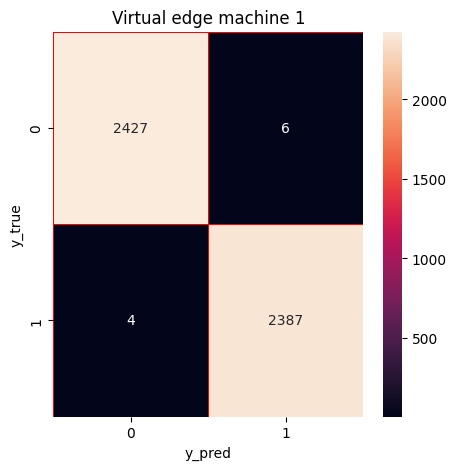

In [ ]:
# Split the data into a training and test set for edge1 dataset
X_train_edge1, X_test_edge1, y_train_edge1, y_test_edge1 = train_test_split(X_edge1, y_edge1, test_size=0.2)
y_train_edge1 = y_train_edge1.ravel()
y_test_edge1 = y_test_edge1.ravel()


# Train a local model using the training data
model = cbt.CatBoostClassifier(depth =3 ,iterations=50, learning_rate=0.5)
model.fit(X_train_edge1, y_train_edge1)

# Predict test set results
y_pred_edge1 = model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
normal_edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

Streaming output truncated to the last 5000 lines.
164:	learn: 0.0020171	total: 632ms	remaining: 134ms
165:	learn: 0.0020171	total: 635ms	remaining: 130ms
166:	learn: 0.0020170	total: 637ms	remaining: 126ms
167:	learn: 0.0020171	total: 640ms	remaining: 122ms
168:	learn: 0.0020171	total: 643ms	remaining: 118ms
169:	learn: 0.0020171	total: 646ms	remaining: 114ms
170:	learn: 0.0020171	total: 649ms	remaining: 110ms
171:	learn: 0.0020171	total: 652ms	remaining: 106ms
172:	learn: 0.0020170	total: 655ms	remaining: 102ms
173:	learn: 0.0020170	total: 658ms	remaining: 98.3ms
174:	learn: 0.0020170	total: 661ms	remaining: 94.4ms
175:	learn: 0.0019993	total: 664ms	remaining: 90.6ms
176:	learn: 0.0019806	total: 668ms	remaining: 86.8ms
177:	learn: 0.0019805	total: 671ms	remaining: 83ms
178:	learn: 0.0019801	total: 675ms	remaining: 79.1ms
179:	learn: 0.0019720	total: 678ms	remaining: 75.4ms
180:	learn: 0.0019719	total: 681ms	remaining: 71.5ms
181:	learn: 0.0019720	total: 685ms	remaining: 67.7ms
182:	l

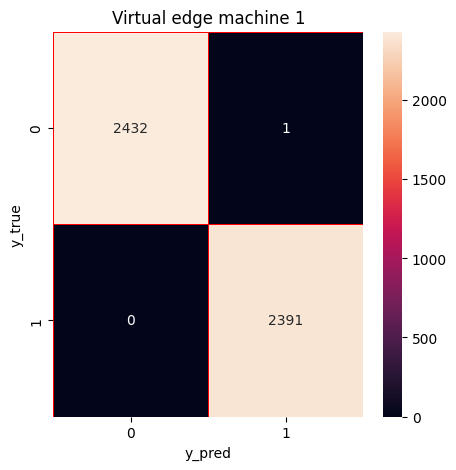

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge1 = best_model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('advanced_local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 1: ", normal_edge1_acc)
print("Accuracy of Hyper Parameter tuned Edge 1: ", edge1_acc)

Accuracy of Normal Edge 1:  0.9979270315091211
Accuracy of Hyper Parameter tuned Edge 1:  0.9997927031509121


### Virtual edge machine 2

0:	learn: 0.3935079	total: 1.4ms	remaining: 68.5ms
1:	learn: 0.2554157	total: 3.09ms	remaining: 74.3ms
2:	learn: 0.1747662	total: 4.73ms	remaining: 74.1ms
3:	learn: 0.1235741	total: 6.11ms	remaining: 70.2ms
4:	learn: 0.0947514	total: 7.67ms	remaining: 69ms
5:	learn: 0.0778628	total: 9.22ms	remaining: 67.6ms
6:	learn: 0.0648673	total: 10.6ms	remaining: 65.1ms
7:	learn: 0.0553250	total: 12.6ms	remaining: 66.4ms
8:	learn: 0.0496664	total: 14.2ms	remaining: 64.6ms
9:	learn: 0.0452437	total: 15.5ms	remaining: 62.1ms
10:	learn: 0.0421090	total: 16.9ms	remaining: 59.9ms
11:	learn: 0.0385578	total: 18.5ms	remaining: 58.4ms
12:	learn: 0.0351811	total: 20.1ms	remaining: 57.1ms
13:	learn: 0.0326167	total: 21.6ms	remaining: 55.4ms
14:	learn: 0.0305262	total: 23ms	remaining: 53.6ms
15:	learn: 0.0292601	total: 24.5ms	remaining: 52.1ms
16:	learn: 0.0276957	total: 26ms	remaining: 50.5ms
17:	learn: 0.0263042	total: 27.5ms	remaining: 48.9ms
18:	learn: 0.0250523	total: 28.8ms	remaining: 47.1ms
19:	learn:

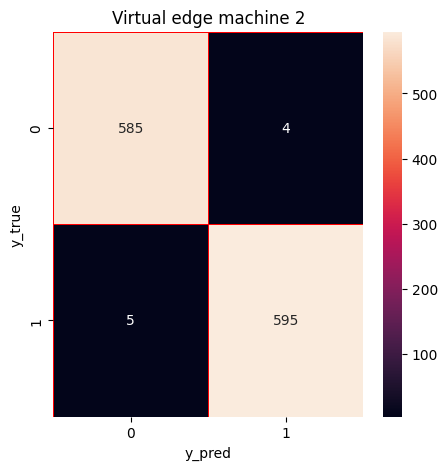

In [ ]:
# Split the data into a training and test set for edge2 dataset
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.2)
y_train_edge2 = y_train_edge2.ravel()
y_test_edge2 = y_test_edge2.ravel()

# Train a local model using the training data
model = cbt.CatBoostClassifier(iterations=50, learning_rate=0.5)
model.fit(X_train_edge2, y_train_edge2)

# Predict test set results
y_pred_edge2 = model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 2:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
normal_edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)

cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_edge2, y_pred_edge2, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

Streaming output truncated to the last 5000 lines.
164:	learn: 0.0020171	total: 643ms	remaining: 136ms
165:	learn: 0.0020171	total: 646ms	remaining: 132ms
166:	learn: 0.0020170	total: 649ms	remaining: 128ms
167:	learn: 0.0020171	total: 651ms	remaining: 124ms
168:	learn: 0.0020171	total: 654ms	remaining: 120ms
169:	learn: 0.0020171	total: 657ms	remaining: 116ms
170:	learn: 0.0020171	total: 660ms	remaining: 112ms
171:	learn: 0.0020171	total: 663ms	remaining: 108ms
172:	learn: 0.0020170	total: 665ms	remaining: 104ms
173:	learn: 0.0020170	total: 668ms	remaining: 99.9ms
174:	learn: 0.0020170	total: 671ms	remaining: 95.9ms
175:	learn: 0.0019993	total: 674ms	remaining: 92ms
176:	learn: 0.0019806	total: 678ms	remaining: 88.1ms
177:	learn: 0.0019805	total: 681ms	remaining: 84.1ms
178:	learn: 0.0019801	total: 684ms	remaining: 80.2ms
179:	learn: 0.0019720	total: 687ms	remaining: 76.4ms
180:	learn: 0.0019719	total: 690ms	remaining: 72.5ms
181:	learn: 0.0019720	total: 693ms	remaining: 68.6ms
182:	l

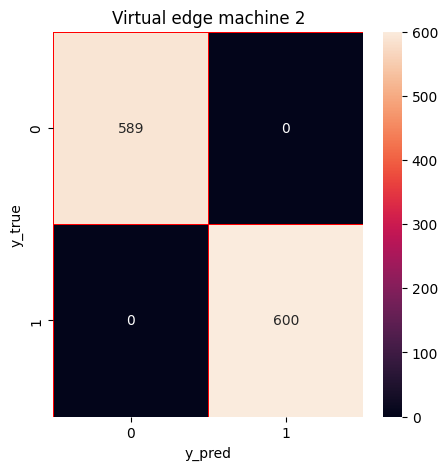

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge2 = best_model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)
cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 2: ", normal_edge2_acc)
print("Accuracy of Hyper Parameter tuned Edge 2: ", edge2_acc)

Accuracy of Normal Edge 2:  0.992430613961312
Accuracy of Hyper Parameter tuned Edge 2:  1.0


### Central Server

In [ ]:
X_train_Central, X_test_Central, y_train_Central, y_test_Central = train_test_split(X_central, y_central, test_size=0.2)

Learning rate set to 0.020043
0:	learn: 0.6611418	total: 2.07ms	remaining: 2.06s
1:	learn: 0.6154213	total: 4.22ms	remaining: 2.1s
2:	learn: 0.5749867	total: 7.16ms	remaining: 2.38s
3:	learn: 0.5371226	total: 9.36ms	remaining: 2.33s
4:	learn: 0.5031095	total: 12.4ms	remaining: 2.46s
5:	learn: 0.4726183	total: 16.1ms	remaining: 2.67s
6:	learn: 0.4459960	total: 18.7ms	remaining: 2.65s
7:	learn: 0.4191249	total: 20.6ms	remaining: 2.55s
8:	learn: 0.3957516	total: 22.6ms	remaining: 2.48s
9:	learn: 0.3753232	total: 24.5ms	remaining: 2.42s
10:	learn: 0.3549056	total: 26.4ms	remaining: 2.37s
11:	learn: 0.3344003	total: 28.3ms	remaining: 2.33s
12:	learn: 0.3156770	total: 30.4ms	remaining: 2.31s
13:	learn: 0.2965116	total: 32.5ms	remaining: 2.29s
14:	learn: 0.2802904	total: 34.5ms	remaining: 2.27s
15:	learn: 0.2679408	total: 36.5ms	remaining: 2.24s
16:	learn: 0.2529565	total: 38.4ms	remaining: 2.22s
17:	learn: 0.2419143	total: 40.4ms	remaining: 2.2s
18:	learn: 0.2304393	total: 42.3ms	remaining: 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


65:	learn: 0.0617528	total: 149ms	remaining: 2.1s
66:	learn: 0.0605844	total: 153ms	remaining: 2.13s
67:	learn: 0.0596332	total: 156ms	remaining: 2.14s
68:	learn: 0.0588706	total: 159ms	remaining: 2.14s
69:	learn: 0.0581044	total: 161ms	remaining: 2.14s
70:	learn: 0.0570593	total: 163ms	remaining: 2.13s
71:	learn: 0.0562452	total: 165ms	remaining: 2.13s
72:	learn: 0.0553891	total: 168ms	remaining: 2.13s
73:	learn: 0.0547063	total: 170ms	remaining: 2.13s
74:	learn: 0.0538340	total: 172ms	remaining: 2.12s
75:	learn: 0.0532882	total: 174ms	remaining: 2.12s
76:	learn: 0.0523969	total: 177ms	remaining: 2.12s
77:	learn: 0.0517196	total: 179ms	remaining: 2.12s
78:	learn: 0.0511297	total: 184ms	remaining: 2.14s
79:	learn: 0.0503127	total: 186ms	remaining: 2.14s
80:	learn: 0.0495733	total: 188ms	remaining: 2.14s
81:	learn: 0.0492439	total: 192ms	remaining: 2.15s
82:	learn: 0.0485578	total: 195ms	remaining: 2.16s
83:	learn: 0.0480422	total: 197ms	remaining: 2.15s
84:	learn: 0.0473889	total: 200m

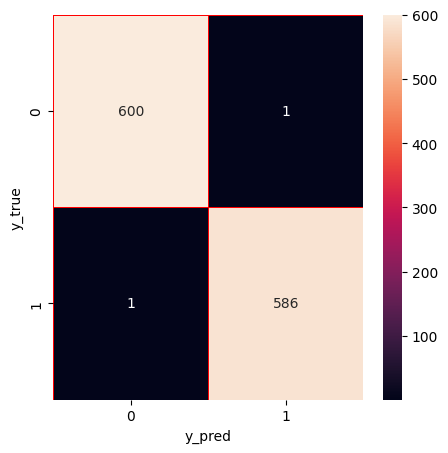

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Load the models
with open('advanced_local_model_edge1.pickle', 'rb') as f:
    model_edge1 = pickle.load(f)
with open('local_model_edge2.pickle', 'rb') as f:
    model_edge2 = pickle.load(f)

# Ensemble the models to create a global model using BaggingClassifier
global_model = BaggingClassifier(base_estimator=model_edge1, n_estimators=2)
global_model.estimators_ = [model_edge1, model_edge2]

global_model.fit(X_train_Central, y_train_Central)

# Predict the test set results using the corresponding central dataset
y_pred = global_model.predict(X_test_Central)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test_Central, y_pred)
print("Confusion matrix for Central Server:\n", conf_matrix)
# Save the global model as a pickle file
with open('global_model.pickle', 'wb') as f:
    pickle.dump(global_model, f)
central_acc = accuracy_score(y_test_Central, y_pred)

print(classification_report(y_test_Central,y_pred))
cm=confusion_matrix(y_test_Central,y_pred)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_Central, y_pred, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Edge Device 1: ", edge1_acc)
print("Accuracy of Edge Device 2: ", edge2_acc)
print("Accuracy of Central Server: ", central_acc)

Accuracy of Edge Device 1:  0.9997927031509121
Accuracy of Edge Device 2:  1.0
Accuracy of Central Server:  0.9983164983164983


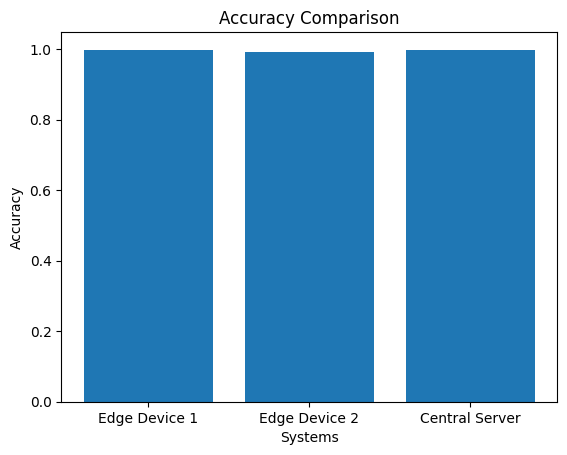

In [ ]:
systems = ['Edge Device 1', 'Edge Device 2', 'Central Server']
accuracies = [normal_edge1_acc, normal_edge2_acc, central_acc]

plt.bar(systems, accuracies)
plt.xlabel('Systems')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()